# Hi and welcome to my notebook!

This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
#load the data
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-27 16:24:15--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.5MB/s   in 1.6s   

2020-08-27 16:24:17 (43.5 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
#show the dataframe
df = pd.read_csv('Data-Collisions.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
#dataframe shape
df.shape

(194673, 38)

In [6]:
#dataframe attributes
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
#drop irrelevant attributes
dfclean = df.drop(columns=['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','COLLISIONTYPE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC',
       'INATTENTIONIND','WEATHER','SDOTCOLNUM','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY'])

In [8]:
dfclean.shape

(194673, 16)

In [9]:
dfclean.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),N,Wet,Daylight,NaN,NaN,N
1,1,-122.347294,47.647172,Block,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,-122.334540,47.607871,Block,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,Dry,Daylight,NaN,NaN,N
3,1,-122.334803,47.604803,Block,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),N,Dry,Daylight,NaN,NaN,N
4,2,-122.306426,47.545739,Intersection,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),0,Wet,Daylight,NaN,NaN,N


In [10]:
#search for blank cells
null_columns=dfclean.columns[dfclean.isnull().any()]
df[null_columns].isnull().sum()

X                  5334
Y                  5334
ADDRTYPE           1926
JUNCTIONTYPE       6329
UNDERINFL          4884
ROADCOND           5012
LIGHTCOND          5170
PEDROWNOTGRNT    190006
SPEEDING         185340
dtype: int64

In [11]:
#drop columns which are mostly empty
dfclean = dfclean.drop(columns=['PEDROWNOTGRNT','SPEEDING'])

In [12]:
#drop blank cells
dfclean.dropna(subset=['ADDRTYPE','JUNCTIONTYPE','UNDERINFL','ROADCOND','LIGHTCOND'],inplace=True)

In [13]:
dfclean.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),N,Wet,Daylight,N
1,1,-122.347294,47.647172,Block,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),0,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,Block,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),0,Dry,Daylight,N
3,1,-122.334803,47.604803,Block,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),N,Dry,Daylight,N
4,2,-122.306426,47.545739,Intersection,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),0,Wet,Daylight,N


In [14]:
dfclean['HITPARKEDCAR'].value_counts()

N    177311
Y      5703
Name: HITPARKEDCAR, dtype: int64

In [15]:
#convert data to binary - hit=1, else 0
dfclean['HITPARKEDCAR']=dfclean['HITPARKEDCAR'].replace(['Y','N'],[1,0])
dfclean['HITPARKEDCAR'].value_counts()

0    177311
1      5703
Name: HITPARKEDCAR, dtype: int64

In [16]:
dfclean['SEVERITYCODE'].value_counts()

1    126344
2     56670
Name: SEVERITYCODE, dtype: int64

In [17]:
dfclean['UNDERINFL'].value_counts()

N    95064
0    78942
Y     5031
1     3977
Name: UNDERINFL, dtype: int64

In [18]:
#convert data to binary - under influence=1, else 0
dfclean['UNDERINFL']=dfclean['UNDERINFL'].replace(['Y','N','1','0'],[1,0,1,0])
dfclean['UNDERINFL'].value_counts()

0    174006
1      9008
Name: UNDERINFL, dtype: int64

In [19]:
dfclean['ROADCOND'].value_counts()

Dry               122227
Wet                46739
Unknown            11531
Ice                 1180
Snow/Slush           979
Other                123
Standing Water       108
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

In [20]:
#drop "unknown"
dfclean = dfclean[dfclean.ROADCOND != 'Unknown']
#convert data to binary - dry=0, all others=1
dfclean['ROADCOND']=dfclean['ROADCOND'].replace(['Dry','Wet','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'],[0,1,1,1,1,1,1,1])
dfclean['ROADCOND'].value_counts()

0    122227
1     49256
Name: ROADCOND, dtype: int64

In [21]:
dfclean['LIGHTCOND'].value_counts()

Daylight                    111624
Dark - Street Lights On      46512
Dusk                          5623
Unknown                       2619
Dawn                          2404
Dark - No Street Lights       1384
Dark - Street Lights Off      1112
Other                          196
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64

In [22]:
#drop "unknown"
dfclean = dfclean[(dfclean.LIGHTCOND != 'Unknown') & (dfclean.LIGHTCOND != 'Other') & (dfclean.LIGHTCOND != 'Dark - Unknown Lighting')]
#convert data to binary - good lighting=0, poor lighting=1
dfclean['LIGHTCOND']=dfclean['LIGHTCOND'].replace(['Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off'],[0,0,1,1,1,1])
dfclean['LIGHTCOND'].value_counts()

0    158136
1     10523
Name: LIGHTCOND, dtype: int64

In [23]:
dfclean['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              75608
At Intersection (intersection related)               59718
Mid-Block (but intersection related)                 21336
Driveway Junction                                    10034
At Intersection (but not related to intersection)     1804
Ramp Junction                                          154
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [24]:
#drop "unknown" and ramp juction
dfclean = dfclean[(dfclean.JUNCTIONTYPE != 'Unknown') & (dfclean.JUNCTIONTYPE != 'Ramp Junction')]
#drop ADDRTYPE column since the correletion should be high
dfclean=dfclean.drop(columns=['ADDRTYPE'])
#convert: MBNR=1,MBR=2,INR=3,IR=4,DJ=5
dfclean['JUNCTIONTYPE']=dfclean['JUNCTIONTYPE'].replace(['Mid-Block (not related to intersection)','Mid-Block (but intersection related)','At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction'],[1,2,3,4,5])
dfclean['JUNCTIONTYPE'].value_counts()

1    75608
4    59718
2    21336
5    10034
3     1804
Name: JUNCTIONTYPE, dtype: int64

In [25]:
#add a 'weekend' column from the 'INCDATE' column data
dfclean['INCDATE'] = pd.to_datetime(dfclean['INCDATE'])
dfclean.insert(1, 'WEEKEND', dfclean['INCDATE'].dt.dayofweek)
dfclean['WEEKEND']=dfclean['WEEKEND'].apply(lambda x: 1 if (x>3)  else 0)
#dfclean.insert(2, 'SEASON', dfclean['INCDATE'].dt.month)

In [26]:
#drop location and time columns for now
df_final = dfclean.drop(columns=['X','Y','INCDATE'])
df_final.head()

,SEVERITYCODE,WEEKEND,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,0,2,0,0,2,4,0,1,0,0
1,1,0,2,0,0,2,1,0,1,0,0
2,1,0,4,0,0,3,1,0,0,0,0
3,1,1,3,0,0,3,1,0,0,0,0
4,2,0,2,0,0,2,4,0,1,0,0


In [27]:
df_final.shape

(168500, 11)

In [28]:
df_final.corr().style.background_gradient(cmap='coolwarm').format("{:.2f}")

,SEVERITYCODE,WEEKEND,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,HITPARKEDCAR
SEVERITYCODE,1.00,-0.02,0.11,0.24,0.21,-0.08,0.16,0.03,0.00,-0.01,-0.08
WEEKEND,-0.02,1.00,0.06,-0.02,-0.03,0.00,-0.02,0.07,0.02,0.00,0.01
PERSONCOUNT,0.11,0.06,1.00,-0.03,-0.05,0.40,0.05,0.01,-0.00,-0.02,-0.04
PEDCOUNT,0.24,-0.02,-0.03,1.00,-0.02,-0.32,0.11,0.01,0.02,0.01,-0.03
PEDCYLCOUNT,0.21,-0.03,-0.05,-0.02,1.00,-0.31,0.09,-0.02,-0.04,0.01,-0.03
VEHCOUNT,-0.08,0.00,0.40,-0.32,-0.31,1.00,-0.09,-0.01,-0.02,-0.01,0.08
JUNCTIONTYPE,0.16,-0.02,0.05,0.11,0.09,-0.09,1.00,-0.07,0.01,-0.01,-0.13
UNDERINFL,0.03,0.07,0.01,0.01,-0.02,-0.01,-0.07,1.00,0.01,0.00,0.03
ROADCOND,0.00,0.02,-0.00,0.02,-0.04,-0.02,0.01,0.01,1.00,0.05,-0.02
LIGHTCOND,-0.01,0.00,-0.02,0.01,0.01,-0.01,-0.01,0.00,0.05,1.00,0.01


In [29]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# setting up for training and train/test split with the slightly more correlated attributes where correlation>0.15

df_model = df_final[['SEVERITYCODE','PEDCOUNT','PEDCYLCOUNT','JUNCTIONTYPE','VEHCOUNT','PERSONCOUNT']]
x = df_model.drop(['SEVERITYCODE'],axis=1)
y = df_model['SEVERITYCODE']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=4)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

ks = 10
acc = np.zeros((ks-1))

for i in range(1,ks):
    knnall=KNeighborsClassifier(n_neighbors=i)
    knnall.fit(x_train, y_train)
    y_pred = knnall.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test, y_pred)

The best accuracy of KNN is 0.7267 with k = 8
KNN F1 score is 0.6703
KNN Jaccard similarity score is 0.6955


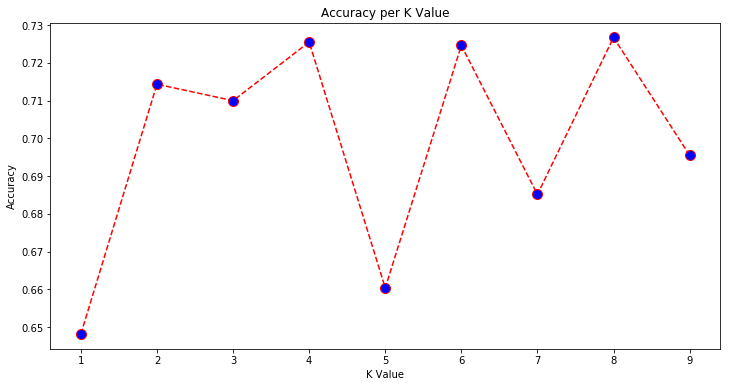

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, ks), acc, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy per K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
print( "The best accuracy of KNN is %.4f" %acc.max(), "with k =", acc.argmax()+1 )

from sklearn.metrics import f1_score
f1knn=f1_score(y_test, y_pred, average='weighted')
print("KNN F1 score is %.4f" %f1knn)

from sklearn.metrics import jaccard_similarity_score
jsknn=jaccard_similarity_score(y_test, y_pred)
print("KNN Jaccard similarity score is %.4f" %jsknn)

In [32]:
from sklearn.tree import DecisionTreeClassifier

max_depth = 10
best_max_depth = 1
acc=np.zeros((max_depth-1))

for i in range(3, max_depth):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    Tree.fit(x_train, y_train)
    y_pred = Tree.predict(x_test)
    acc[i-1] = metrics.accuracy_score(y_test, y_pred)
    
print("The best accuracy of Decision Tree is %.4f" %acc.max(), "with a max depth of", acc.argmax()+1)

f1dt=f1_score(y_test, y_pred, average='weighted')
print("Decision Tree F1 score is %.4f" %f1dt)

jsdt=jaccard_similarity_score(y_test, y_pred)
print("Decision Tree Jaccard similarity score is %.4f" %jsdt)

The best accuracy of Decision Tree is 0.7315 with a max depth of 7
Decision Tree F1 score is 0.6828
Decision Tree Jaccard similarity score is 0.7312


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LogR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
y_pred = LogR.predict(x_test)
y_pred_prob = LogR.predict_proba(x_test)

from sklearn.metrics import log_loss
print("Logistic Regression log loss is %.4f" %log_loss(y_test, y_pred_prob))

f1lr=f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression F1 score is %.4f" %f1lr)

jslr=jaccard_similarity_score(y_test, y_pred)
print("Logistic Regression Jaccard similarity score is %.4f" %jslr)

Logistic Regression log loss is 0.5645
Logistic Regression F1 score is 0.6684
Logistic Regression Jaccard similarity score is 0.7273


In [35]:
js = [jsknn, jsdt, jslr]

f1 = [f1knn, f1dt, f1lr]

ll = ['NA', 'NA', log_loss(y_test, y_pred_prob)]


report = pd.DataFrame(js, index=['KNN','Decision Tree', 'Logistic Regression'])
report.columns = ['Jaccard']
report.insert(loc=1, column='F1-score', value=f1)
report.insert(loc=2, column='Log loss', value=ll)
report.columns.name = 'Algorithm'
report

Algorithm,Jaccard,F1-score,Log loss
KNN,0.695519,0.670289,NA
Decision Tree,0.731157,0.682759,NA
Logistic Regression,0.727329,0.668387,0.564481
